In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy import sparse 
from scipy.spatial import ConvexHull
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
from py_pcha import PCHA

In [2]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import anndata 
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
import collections
from natsort import natsorted
import re

from scipy import stats
from scipy import sparse
from sklearn.decomposition import PCA
from umap import UMAP

from matplotlib.colors import LinearSegmentedColormap

from scroutines.config_plots import *
from scroutines import powerplots # .config_plots import *
from scroutines import pnmf
from scroutines import basicu
from scroutines.gene_modules import GeneModules  


In [3]:
from scipy import stats
from matplotlib.ticker import MaxNLocator

def plot(x, y, aspect_equal=False, density=False, hue='type'):
    n = len(cases)
    fig, axs = plt.subplots(1,n,figsize=(4*n,4*1), sharex=True, sharey=True)
    for i, (ax, cond) in enumerate(zip(axs.flat, cases)):
        ax.set_title(cond)
        sns.scatterplot(data=res, 
                        x=x, y=y, 
                        c='lightgray',
                        s=1, edgecolor='none', 
                        legend=False,
                        ax=ax,
                        rasterized=True,
                       )
        if hue == 'type':
            sns.scatterplot(data=res[res['cond']==cond].sample(frac=1, replace=False),
                            x=x, y=y, 
                            hue='type',
                            hue_order=list(palette_types.keys()),
                            palette=palette_types,
                            s=3, edgecolor='none', 
                            legend=False,
                            ax=ax,
                            rasterized=True,
                           )
        else:
            sns.scatterplot(data=res[res['cond']==cond].sample(frac=1, replace=False),
                            x=x, y=y, 
                            hue='rep',
                            # hue_order=list(palette_types.keys()),
                            # palette=palette_types,
                            s=3, edgecolor='none', 
                            legend=False,
                            ax=ax,
                            rasterized=True,
                           )
            
        if density:
            sns.histplot(data=res[res['cond']==cond],
                            x=x, y=y, 
                            legend=False,
                            ax=ax,
                            rasterized=True,
                           )
        sns.despine(ax=ax)
        ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
        if aspect_equal:
            ax.set_aspect('equal')
        if i > 0:
            ax.set_xlabel('')
            ax.set_ylabel('')
    return fig
    # plt.show()
    
def plot2(x, y, hue=None, aspect_equal=False, s=10, vmin=-2.5, vmax=2.5, vminp=None, vmaxp=None, cmap='coolwarm'):
    n = len(cases)
    fig, axs = plt.subplots(1,n,figsize=(4*n,4*1), sharex=True, sharey=True)
    fig.suptitle(hue, x=0, ha='left')
    for i, (ax, cond) in enumerate(zip(axs.flat, cases)):
        ax.set_title(cond)
        show = res[res['cond']==cond]
        
        if vminp is not None:
            vmin = np.percentile(show[hue], vminp)
        if vmaxp is not None:
            vmax = np.percentile(show[hue], vmaxp)
            
        if hue:
            # order = np.argsort(show[hue].values)
            ax.scatter(
                       # show[x].iloc[order], show[y].iloc[order], c=show[hue].iloc[order], 
                       show[x], show[y], c=show[hue], 
                       cmap=cmap,
                       vmin=vmin, vmax=vmax,
                       s=s, 
                       edgecolor='none', 
                       rasterized=True,
                      )
        else:
            r, p = stats.spearmanr(show[x], show[y])
            ax.scatter(show[x], show[y],  
                       s=s, 
                       edgecolor='none', 
                       rasterized=True,
                      )
            ax.set_title(f'{cond}\n r={r:.2f}')
        sns.despine(ax=ax)
        ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
        if aspect_equal:
            ax.set_aspect('equal')
        if i == 0: 
            ax.set_xlabel(x)
            ax.set_ylabel(y)
        else:
            ax.set_xlabel('')
            ax.set_ylabel('')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout()
    
    return fig
    # plt.show()
    
def plot3(x, y, hue, aspect_equal=False, s=10, vmin=-2.5, vmax=2.5, vminp=None, vmaxp=None, cmap='coolwarm'):
    n = len(cases_nr_short)
    fig, axs = plt.subplots(1,n,figsize=(4*n,4*1), sharex=True, sharey=True)
    fig.suptitle(hue, x=0, ha='left')
    
    showall = res[res['cond'].isin(cases_nr_short)]
    if vminp is not None:
        vmin = np.percentile(showall[hue], vminp)
    if vmaxp is not None:
        vmax = np.percentile(showall[hue], vmaxp)
            
    for i, (ax, cond) in enumerate(zip(axs.flat, cases_nr_short)):
        ax.set_title(cond)
        show = res[res['cond']==cond]
        
        ax.scatter(
                   show[x], show[y], c=show[hue], 
                   cmap=cmap,
                   vmin=vmin, vmax=vmax,
                   s=s, 
                   edgecolor='none', 
                   rasterized=True,
                  )
            
        sns.despine(ax=ax)
        ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
        if aspect_equal:
            ax.set_aspect('equal')
        if i == 0: 
            ax.set_xlabel(x)
            ax.set_ylabel(y)
        else:
            ax.set_xlabel('')
            ax.set_ylabel('')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout()
    
    return fig
    # plt.show()

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy import sparse 
from scipy.spatial import ConvexHull
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
from py_pcha import PCHA

from scipy.stats import gaussian_kde

In [5]:
def norm(x, depths):
    """
    Arguments: 
        x - cell by gene count matrix
        depths - sequencing depth per cell
        
    Output:
        xn - normalized count matrix

    This function takes raw counts as the input, and does the following steps sequencially.
         1. size normalization (CP10k) 
         2. log1p normalization (base 2 - log2(1+CP10k))
         3. zscore per gene  
    """

    xn = x/depths.reshape(-1,1)*1e4
    xn = np.log2(1+xn)
    xn = zscore(xn, axis=0)

    if np.any(np.isnan(xn)):
        print('Warning: the normalized matrix contains nan values. Check input.')
        xn = np.nan_to_num(xn, 0)

    return xn

In [6]:
def proj(x_norm, ndim, method='PCA'):
    """
    Arguments: 
        x_norm - normalized cell by gene feature matrix
        ndim   - number of dimensions

    Output:
        x_proj - a low-dimensional representation of `x_norm` 

    Here we only implemented PCA - a common projection method widely used, including by
    Adler et al. 2019 and Xie et al. 2024 for the Achetypal Analysis of scRNA-seq data.

    In principle, one can also choose to use other projection methods as needed.
    """

    if method == 'PCA':
        x_proj = PCA(n_components=ndim).fit_transform(x_norm)
    else:
        raise ValueError('methods other than PCA are not implemented...')

    return x_proj


In [7]:
def pcha(X, noc=3, delta=0, **kwargs):
    """
    """
    XC, S, C, SSE, varexpl = PCHA(X, noc=noc, delta=delta, **kwargs)
    XC = np.array(XC)
    XC = XC[:,np.argsort(XC[0])] # assign an order according to x-axis 
    return XC 

In [8]:
def downsamp(x, which='cell', p=0.8, seed=None):
    """
    Arguments:
        x - cell by gene matrix
        which - downsample cells (rows) or genes (columns)
        p - fraction of cells/genes to keep - should be a value between ~ [0,1]
    """
    n0, n1 = x.shape
    
    rng = np.random.default_rng(seed=seed)
    
    if which in [0, 'cell', 'row']:
        return x[rng.random(n0)<p, :]
    elif which in [1, 'gene', 'col', 'column']:
        return x[:, rng.random(n1)<p]
    else:
        raise ValueError('choose from cell or gene')

In [9]:
def shuffle_rows_per_col(x, seed=None):
    """
    Arguments:
       x - cell by gene matrix
       seed - a random seed for reproducibility
    
    shuffles entries across rows (cells) independently for each col (gene)
    """
    rng = np.random.default_rng(seed=seed)
    x_shuff = rng.permuted(x, axis=0)
    return x_shuff

In [10]:
def plot_archetype(ax, aa, fmt='--o', color='k', **kwargs):
    """
    """
    ax.plot(aa[0].tolist()+[aa[0,0]], aa[1].tolist()+[aa[1,0]], fmt, color=color, **kwargs)

In [11]:
def get_t_ratio(xp, aa):
    """
    Arguments:
     xp -- projected matrix (cell by 2)
     aa -- inferred archetypes (2 by noc)
     note that this function only works for 2-dimensional space only
     
    Return: 
     t-ratio - ratio of areas (convex hull vs PCH)
     
    """
    assert xp.shape[1] == aa.shape[0] == 2
    
    ch_area  = ConvexHull(xp).volume
   
    x = aa[0]
    y = aa[1]
    pch_area = 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

    return ch_area/pch_area 

In [12]:
class SingleCellArchetype():
    """
    """
    def __init__(self, x, depths, types):
        """
        Arguments: 
            x - cell by gene count matrix
            depths - sequencing depth per cell
            types  - cell type labels per cell
        
        Initiate the SingleCellArchetype object

        """
        
        # input
        self.x = x
        self.depths = depths
        self.types = types
        
        # cell type label
        types_idx, types_lbl = pd.factorize(types, sort=True)
        
        self.types_idx = types_idx
        self.types_lbl = types_lbl 
        
        # normalize
        self.xn = norm(self.x, self.depths)
        
        # feature matrix 
        self.xf = None 
        return 
        
    def setup_feature_matrix(self, method='data'):
        """
        """
        if method == 'data': 
            self.xf = self.xn
            print('use data')
            return  
        
        elif method == 'gshuff':
            # shuffle gene expression globally across all cells
            self.xf = shuffle_rows_per_col(self.xn)
            print('use shuffled data')
            return
            
        elif method == 'tshuff':
            # shuff each gene across cells independently - internally for each type A,B,C
            xn = self.xn
            xn_tshuff = xn.copy()
            
            types_lbl = self.types_lbl
            types_idx = self.types_idx
            for i in range(len(types_lbl)):
                xn_tshuff[types_idx==i] = shuffle_rows_per_col(xn[types_idx==i])
            self.xf = xn_tshuff
            print('use per-type shuffled data')
            return
        else:
            raise ValueError('choose from (data, gshuff, tshuff)')
    
    def proj_and_pcha(self, ndim, noc, **kwargs):
        """
        """
        xp = proj(self.xf, ndim)
        aa = pcha(xp.T, noc=noc, **kwargs)
        
        self.xp = xp
        self.aa = aa
        return (xp, aa)
        
    def downsamp_proj_pcha(self, ndim, noc, nrepeats=10, which='cell', p=0.8, **kwargs): 
        """
        """
        aa_dsamps = []
        for i in range(nrepeats):
            xn_dsamp = downsamp(self.xf, which=which, p=p)
            xp_dsamp = proj(xn_dsamp, ndim)
            aa_dsamp = pcha(xp_dsamp.T, noc=noc, **kwargs)
            aa_dsamps.append(aa_dsamp)
            
        return aa_dsamps
    
    def t_ratio_test(self, ndim, noc, nrepeats=10, **kwargs): 
        """
        this only work for 2-dimensional space for now
        """
        assert ndim == 2
        
        self.setup_feature_matrix(method='data')
        xp, aa = self.proj_and_pcha(ndim, noc)
        t_ratio = get_t_ratio(xp, aa)
        
        t_ratios_shuff = []
        for i in range(nrepeats):
            self.setup_feature_matrix(method='gshuff')
            xp_shuff, aa_shuff = self.proj_and_pcha(ndim, noc)
            t_ratio_shuff = get_t_ratio(xp_shuff, aa_shuff)
            t_ratios_shuff.append(t_ratio_shuff)
            
        pvalue = (np.sum(t_ratio > t_ratios_shuff)+1)/nrepeats
        
        return t_ratio, t_ratios_shuff, pvalue

## load data

In [13]:
%%time
f = '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/allen_dev_v1/DevVIS_multiome_snRNA_processed.h5ad'
adata = sc.read(f)
adata = adata[adata.obs['subclass_label'] == 'L2/3 IT CTX Glut']
adata = adata[adata.obs['age_label'].str.contains(r'^P')]
adata

CPU times: user 2.57 s, sys: 8.87 s, total: 11.4 s
Wall time: 52.2 s


View of AnnData object with n_obs × n_vars = 22662 × 32285
    obs: 'Unnamed: 0', 'subcluster_id', 'subcluster_label', 'cluster_label', 'subclass_label', 'class_label', 'subcluster_prob', 'cluster_probability', 'subclass_probability', 'class_probability', 'library_prep', 'roi', 'sex', 'donor_name', 'age_label', 'cellNames'

In [14]:
adata.obs['age_label'].value_counts(sort=False)

P0      748
P2      856
P4     1722
P5     2395
P8     1305
P9     1324
P11     738
P14    5546
P56    6364
P58    1664
Name: age_label, dtype: int64

In [15]:
adata.X.data

array([2, 2, 1, ..., 3, 5, 4], dtype=int32)

## process data

In [16]:
# remove mitocondria genes
adata = adata[:,~adata.var.index.str.contains(r'^mt-')]
adata = adata[:,~adata.var.index.str.contains(r'Xist')]
adata

View of AnnData object with n_obs × n_vars = 22662 × 32271
    obs: 'Unnamed: 0', 'subcluster_id', 'subcluster_label', 'cluster_label', 'subclass_label', 'class_label', 'subcluster_prob', 'cluster_probability', 'subclass_probability', 'class_probability', 'library_prep', 'roi', 'sex', 'donor_name', 'age_label', 'cellNames'

In [17]:
# filter genes
cond = np.ravel((adata.X>0).sum(axis=0)) > 10 # expressed in more than 10 cells
adata = adata[:,cond]
genes = adata.var.index.values

# counts
x = adata.X
cov = np.array(np.sum(x, axis=1)).reshape(-1,)

# CP10k
# xn = x/cov.reshape(x.shape[0], -1)*1e4
xn = (sparse.diags(1/cov).dot(x))*1e4

# log2(CP10k+1)
# xln = xn.copy()
# xln.data = np.log2(xln.data+1)

xnorm = np.array(xn.todense())

# adata.layers[   'norm'] = xnorm 
adata.layers['lognorm'] = np.log2(1+xnorm)
# adata.layers['zlognorm'] = zscore(np.log2(1+xnorm), axis=0)

In [18]:
# select HVGs with mean and var
nbin = 20
qth = 0.3

# min
gm = np.ravel(xn.mean(axis=0))

# var
tmp = xn.copy()
tmp.data = np.power(tmp.data, 2)
gv = np.ravel(tmp.mean(axis=0))-gm**2

# cut 
lbl = pd.qcut(gm, nbin, labels=np.arange(nbin))
gres = pd.DataFrame()
gres['name'] = genes
gres['lbl'] = lbl
gres['mean'] = gm
gres['var'] = gv
gres['ratio']= gv/gm

# select
gres_sel = gres.groupby('lbl')['ratio'].nlargest(int(qth*(len(gm)/nbin))) #.reset_index()
gsel_idx = np.sort(gres_sel.index.get_level_values(1).values)
assert np.all(gsel_idx != -1)

In [19]:
adata_hvg = adata[:,gsel_idx]
print(adata_hvg.shape)
genes_hvg = adata_hvg.var.index.values

# adata_hvg_early = adata_hvg[adata_hvg.obs['cond'].isin(['P8'])]
adata_hvg_later = adata_hvg[adata_hvg.obs['age_label'].isin(['P56', 'P58'])]

(22662, 7140)


In [20]:
genes_hvg # to File
# np.savetxt('/u/home/f/f7xiesnm/v1_multiome/l23_alltime_hvgs_n4940.txt', genes_hvg, fmt='%s')

array(['Xkr4', 'Gm1992', 'Gm19938', ..., 'Gm47283', 'AC133103.1',
       'CAAA01118383.1'], dtype=object)

In [21]:
# learn on parts, project for everything
# pca_early = PCA(n_components=5)
# pca_early.fit(adata_hvg_early.layers['lognorm'][...]) #
# pcs_early = pca_early.transform(adata_hvg.layers['lognorm'][...])

# pcs_early[:,0] = -pcs_early[:,0] # flip PC1
# # pcs_early[:,2] = -pcs_early[:,2] # flip PC3

pca_later = PCA(n_components=5)
pca_later.fit(adata_hvg_later.layers['lognorm'][...]) #
pcs_later = pca_later.transform(adata_hvg.layers['lognorm'][...])

# pcs_later[:,0] = -pcs_later[:,0] # flip PC1
pcs_later[:,1] = -pcs_later[:,1] # flip PC2
pcs_later[:,2] = -pcs_later[:,2] # flip PC3

In [22]:
pca_all = PCA(n_components=20)
pca_all.fit(adata_hvg.layers['lognorm'][...]) #
pcs_all = pca_all.transform(adata_hvg.layers['lognorm'][...])

pcs_all[:,0] = -pcs_all[:,0] # flip PC1
pcs_all[:,1] = -pcs_all[:,1] # flip PC1

In [23]:
# pca_later_shuff = PCA(n_components=5)
# pca_later_shuff.fit(shuffle_rows_per_col(adata_hvg_later.layers['lognorm'][...])) # random direction
# pcs_later_shuff = pca_later_shuff.transform(adata_hvg.layers['lognorm'][...]) # original data

In [24]:
# %%time
# ucs_all = UMAP(n_components=2, n_neighbors=30).fit_transform(pcs_all) #

In [25]:
# vt = pca_early.components_
# topgenes_early = genes_hvg[np.flip(np.argsort(np.abs(vt), axis=1), axis=1)]
# print(topgenes_early[:,:8])

vt = pca_later.components_
topgenes_later = genes_hvg[np.flip(np.argsort(np.abs(vt), axis=1), axis=1)]
print(topgenes_later[:,:8])

[['Hsp90ab1' 'Calm1' 'Ubb' 'Hsp90aa1' 'Atp6v0c' 'Tmsb4x' 'Hs6st3' 'Actb']
 ['Cdh13' 'Robo1' 'Cntn5' 'Etl4' 'Rfx3' 'Cdh12' 'Epha6' 'Kirrel3']
 ['Pcdh15' 'Sorcs3' 'Trpc6' 'Hs6st3' 'Cntnap2' 'Bdnf' 'Kirrel3' 'Kcnh5']
 ['Tafa1' 'Ntrk2' 'Homer1' 'Etl4' '1700016P03Rik' 'Hs6st3' 'Pcdh15'
  'Prr16']
 ['Brinp3' 'Egfem1' 'Nell1' 'Gpc6' 'Flrt2' '1700016P03Rik' 'Cntn4'
  'Hs6st3']]


In [26]:
# adata.obsm['pca_early'] = pcs_early
adata.obsm['pca_later'] = pcs_later
adata.obsm['pca_all']   = pcs_all

In [27]:
# f_out1 = "../../data/v1_multiome/L23_allmultiome_raw_pca_early.npy"
# f_out2 = "../../data/v1_multiome/L23_allmultiome_raw_pca_later.npy"
# f_out3 = "../../data/v1_multiome/L23_allmultiome_raw_pca_all.npy"

# np.save(f_out1, pcs_early)
# np.save(f_out2, pcs_later)
# np.save(f_out3, pcs_all)

# plot

In [28]:
res0 = pd.DataFrame(zscore(adata.layers['lognorm'][...], axis=0), columns=genes)

# res1 = pd.DataFrame(pcs_early, columns=np.char.add("pcs_early", ((1+np.arange(pcs_early.shape[1])).astype(str))))
res2 = pd.DataFrame(pcs_later, columns=np.char.add("pcs_later", ((1+np.arange(pcs_later.shape[1])).astype(str))))
res3 = pd.DataFrame(pcs_all  , columns=np.char.add("pcs_all",   ((1+np.arange(pcs_all.shape[1])).astype(str))))

# res4 = pd.DataFrame(pcs_later_shuff, columns=np.char.add("pcs_later_shuff", ((1+np.arange(pcs_later_shuff.shape[1])).astype(str))))
# res4 = pd.DataFrame(ucs_all, columns=np.char.add("ucs_all", ((1+np.arange(ucs_all.shape[1])).astype(str))))

res = pd.concat([res0, 
                 # res1, 
                 res2, 
                 res3, 
                 # res4,
                ], axis=1)

In [29]:
res['cov'] = cov #adata.obs['age_label'].astype(str).values
res['cond'] = adata.obs['age_label'].astype(str).values

# res['samp'] = adata.obs['sample'].values
# res['rep']  = res['samp'].apply(lambda x: x[-1])

In [30]:
allcolors = sns.color_palette('tab20b', 20)
allcolors

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [31]:
allcolors2 = sns.color_palette('tab10', 20)
allcolors2

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [32]:
# palette = collections.OrderedDict({
#      "P6": allcolors[1],
#      "P8": allcolors[0],
#     "P10": allcolors[4+2],
#     "P12": allcolors[4+1],
#     "P14": allcolors[4+0],
    
#     "P17": allcolors[8+2],
#     "P21": allcolors[8+0],
    
#     "P12DR": allcolors[8+2],
#     "P14DR": allcolors[8+0],
#     "P17DR": allcolors[8+0],
#     "P21DR": allcolors[8+0],
    
# })
# cases = np.array(list(palette.keys()))
# cases_nr = np.array(list(palette.keys()))[:-4]
# cases_nr_short = cases_nr # np.array(list(palette.keys()))[[0,2,4,5,6]]

# cond_order_dict = {
#     'P6':  0,
#     'P8':  1,
#     'P10': 2,
#     'P12': 3,
#     'P14': 4,
#     'P17': 5,
#     'P21': 6,
    
#     'P12DR': 7,
#     'P14DR': 8,
#     'P17DR': 9,
#     'P21DR': 10,
# }
# unq_conds = np.array(list(cond_order_dict.keys()))
# adata.obs['cond_order'] = adata.obs['cond'].apply(lambda x: cond_order_dict[x])

# palette_types = collections.OrderedDict({
#     'L2/3_A': allcolors2[0],
#     'L2/3_B': allcolors2[1],
#     'L2/3_C': allcolors2[2],
# })             

# palette_types = {
#     'c14': 'C0', 
#     'c18': 'C1',
#     'c16': 'C2', 
    
#     'c13': 'C0', 
#     'c15': 'C1', 
#     'c17': 'C2',
# }
# type_order = [key for key, val in palette_types.items()]
# type_order

In [33]:
palette_time = sns.cubehelix_palette(n_colors=7, start=.5, rot=-.5)
palette_time

[[0.7611058395410276, 0.897713045748989, 0.8454349452836011],
 [0.5971141798969934, 0.7937057782728156, 0.7810232311303338],
 [0.47599829224141754, 0.6647212472467017, 0.7336470666017856],
 [0.3990505212812544, 0.5225468644482053, 0.672208880139362],
 [0.34351942619215814, 0.3706877966569699, 0.5686561064138481],
 [0.28428983687847387, 0.2295617155794883, 0.4176219861426439],
 [0.19219588654040817, 0.11144874684946916, 0.2327834607416993]]

In [34]:
todo_conds = [
    'P0', 'P2', 'P4',
    'P5', 'P8', 'P9',
    'P11', 'P14', 
    'P56', 'P58',
]

In [35]:
ndim = 2
noc = 3
delta = 0.2 # 0

aas = []

for cond in todo_conds:
    print(cond)
    xp = res[res['cond']==cond][['pcs_later2', 'pcs_later3']].values # pcs_later[:,:2]
    aa = pcha(xp.T, noc=noc, delta=delta)
    aas.append(aa)
    

P0
P2
P4
P5
P8
P9
P11
P14
P56
P58


In [36]:
xbins = np.linspace(-6,6,2*12+1)
ybins = np.linspace(-5,5,2*10+1)

xbins, ybins

(array([-6. , -5.5, -5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. ,
        -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,
         5. ,  5.5,  6. ]),
 array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]))

In [37]:
from scipy.stats import gaussian_kde

In [38]:
# fit KDE

kdes = []
kde_values = []
n = len(todo_conds)
for i, cond in enumerate(todo_conds):
    xp = res[res['cond']==cond][['pcs_later2', 'pcs_later3']].values # pcs_later[:,:2]
    
    # Fit KDE
    kde = gaussian_kde(xp.T)
    kdes.append(kde)
    kde_values.append(kde(xp.T))
    


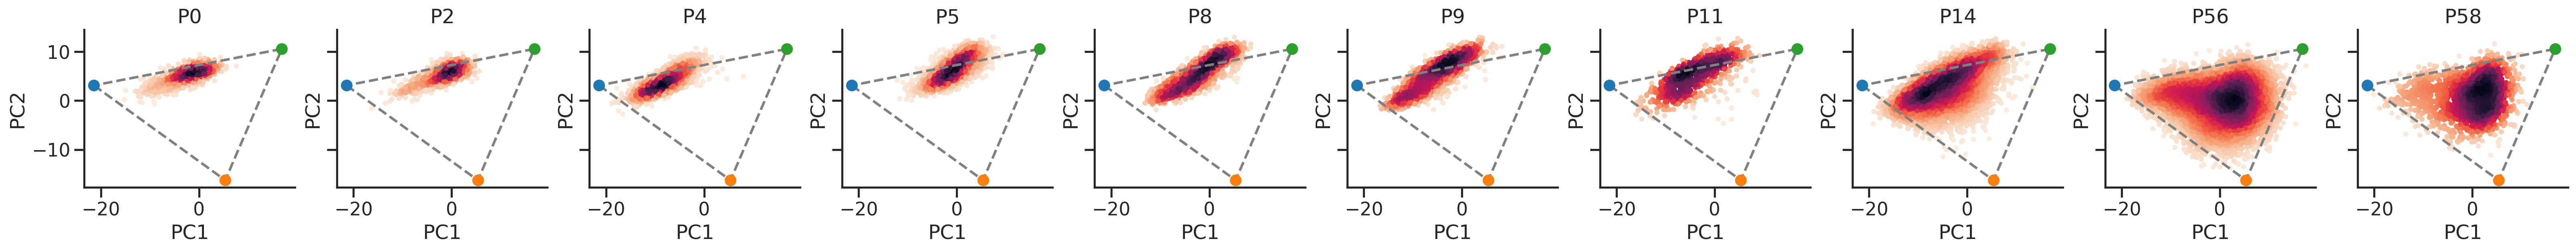

In [39]:
# plot
n = len(todo_conds)
fig, axs = plt.subplots(1,n,figsize=(4*n,3), sharex=True, sharey=True)
for i, cond in enumerate(todo_conds):
    ax = axs[i]
    kde = kdes[i]
    kde_val = kde_values[i]
    aa = aas[-2]
    
    ressub = res[res['cond']==cond]
    xp = ressub[['pcs_later2', 'pcs_later3']].values # pcs_later[:,:2]
    
    # # c = ressub['cov']
    # c = ressub['Meis2']
    # c = ressub['Foxp1']
    # c = ressub['Sorcs3']
    
    
    # calc KDE
    # c = kde(xp.T)
    c = kde_val
    
    # histogram
#     hist, _, _ = np.histogram2d(xp[:,0], xp[:,1], bins=[xbins, ybins])
#     hist = hist.T[::-1]
    
#     # sns.heatmap(hist, ax=ax)
#     ax.imshow(hist/np.sum(hist), 
#               extent=(-6,6,-5,5), 
#               cmap='gray_r',
#               )
    vmax = np.percentile(c, 95)
    vmin = np.percentile(c, 5)

    ax.scatter(xp[:,0], xp[:,1], 
               c=c, 
               # vmax=2.5,  #vmax,
               # vmin=-2.5, #vmin,
               # cmap='coolwarm', 
               cmap='rocket_r', 
               s=10, rasterized=True) #  c=types_colorvec, s=2)
    
    plot_archetype(ax, aa, fmt='--', color='gray', zorder=2)
    ax.scatter(aa[0,0], aa[1,0], color='C0', zorder=2)
    ax.scatter(aa[0,1], aa[1,1], color='C1', zorder=2)
    ax.scatter(aa[0,2], aa[1,2], color='C2', zorder=2)
    
    ax.set_title(cond)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_aspect('equal')
    sns.despine(ax=ax)
    ax.grid(False)
    # break
    
# output = os.path.join(outdirfig, f'pc12_density.pdf')
# powerplots.savefig_autodate(fig, output)
plt.show()

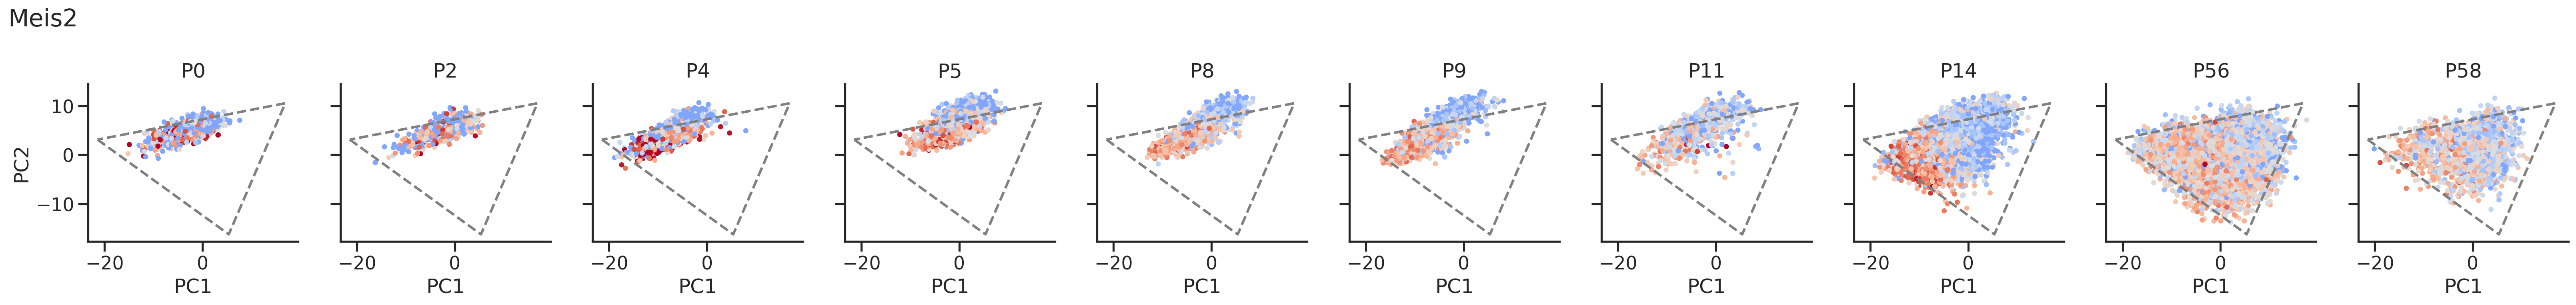

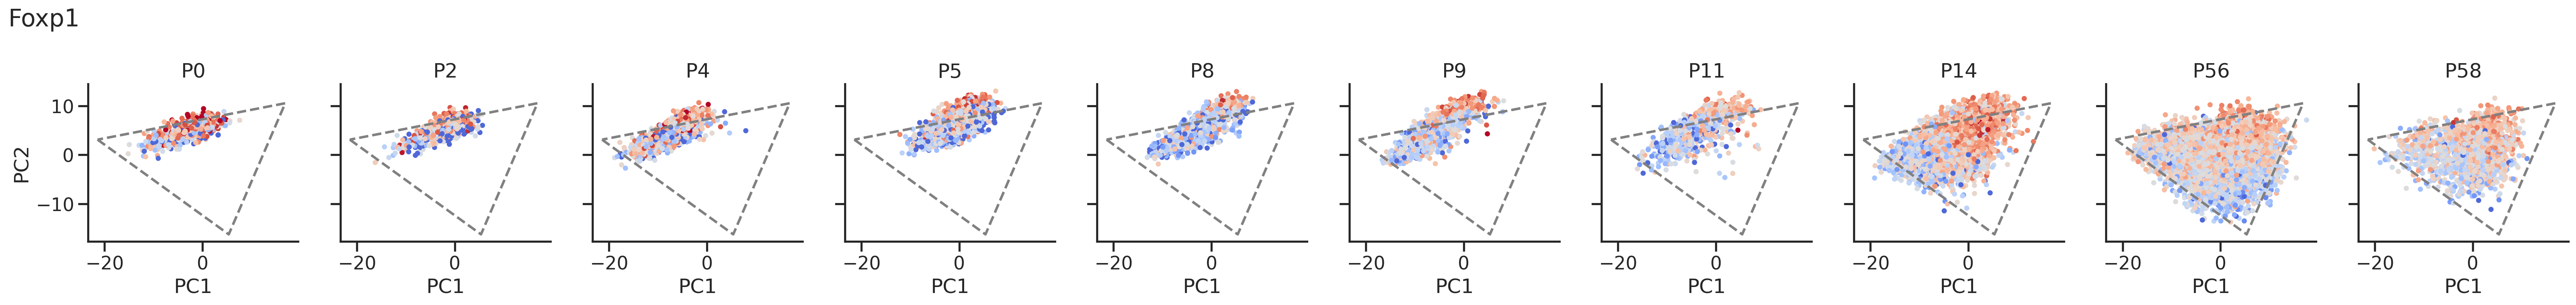

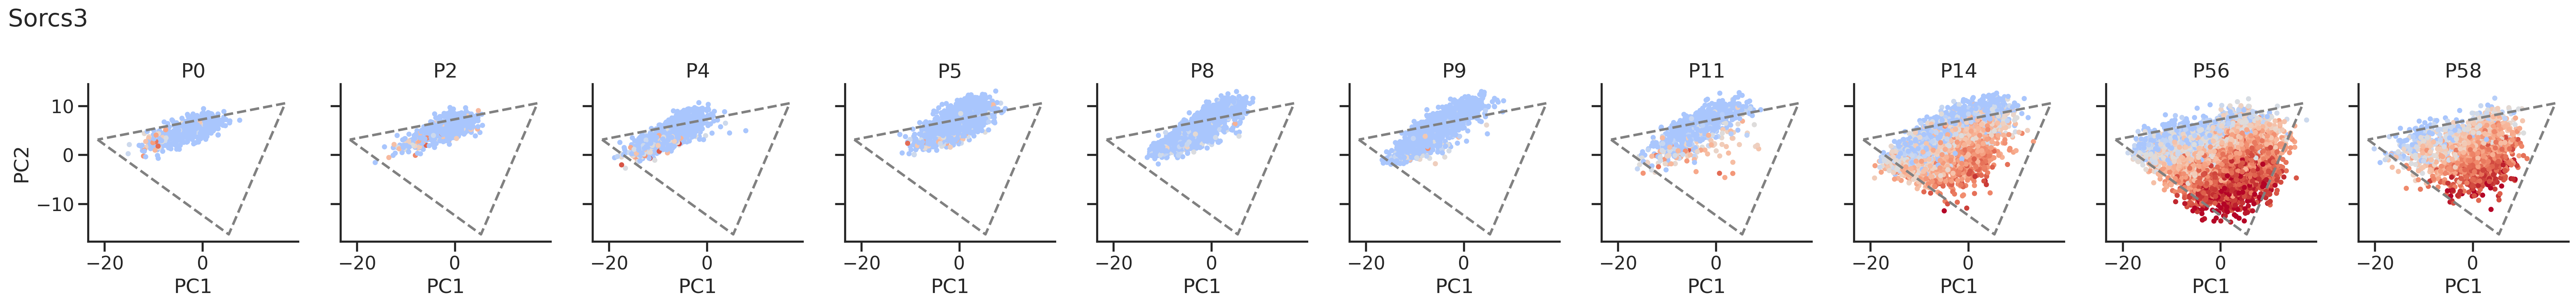

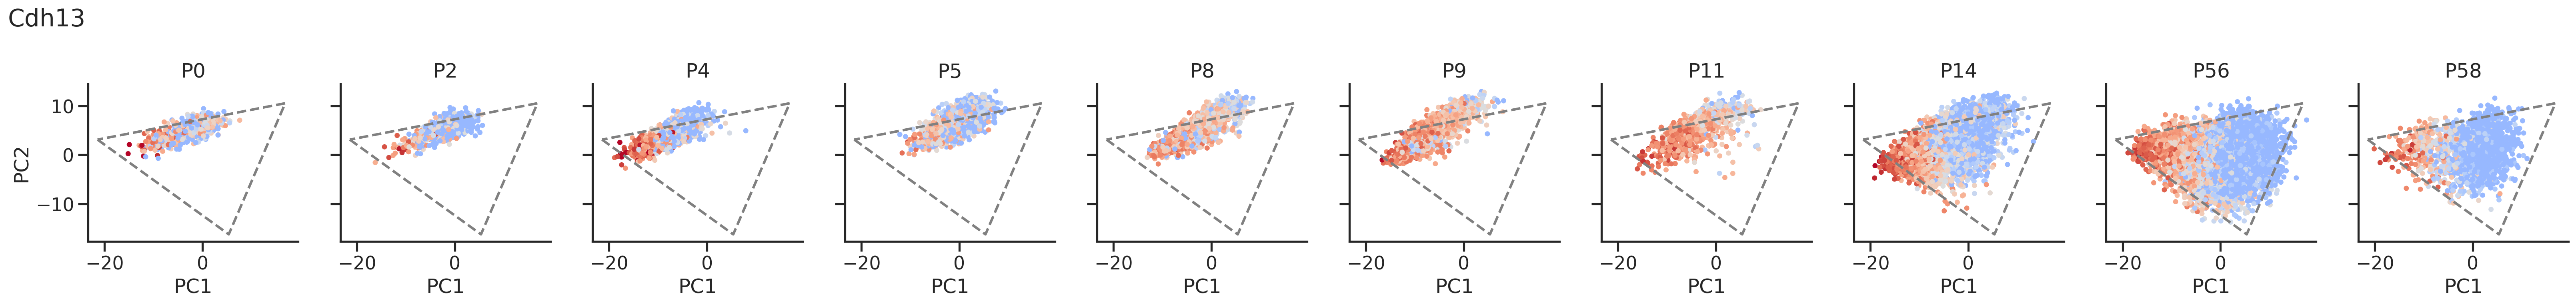

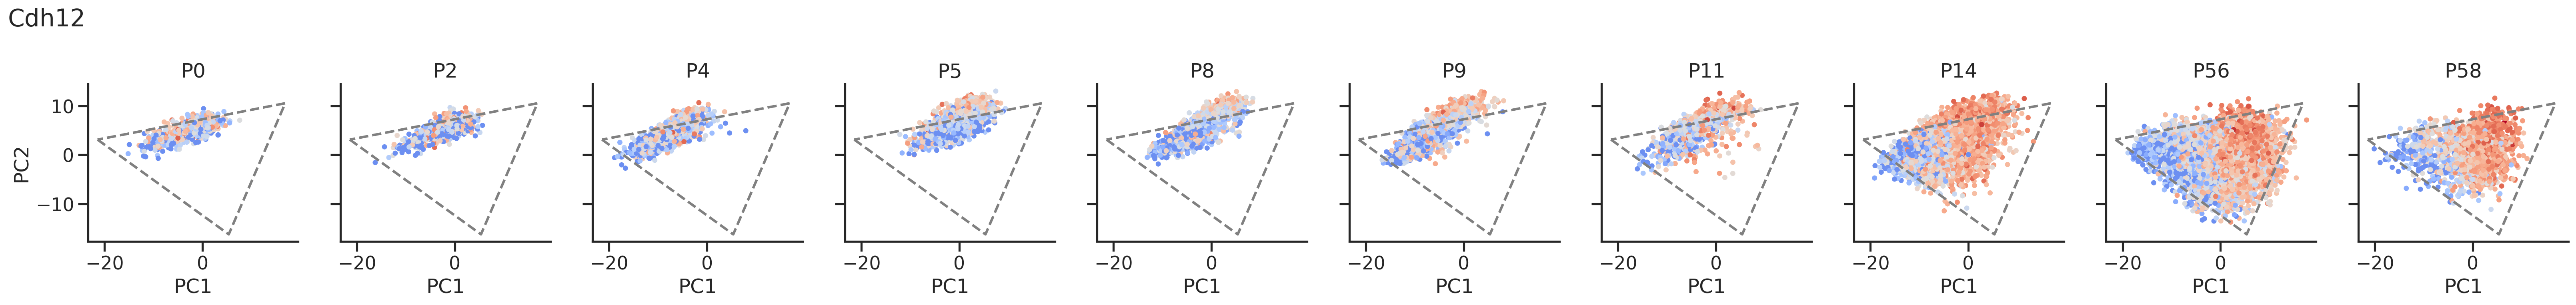

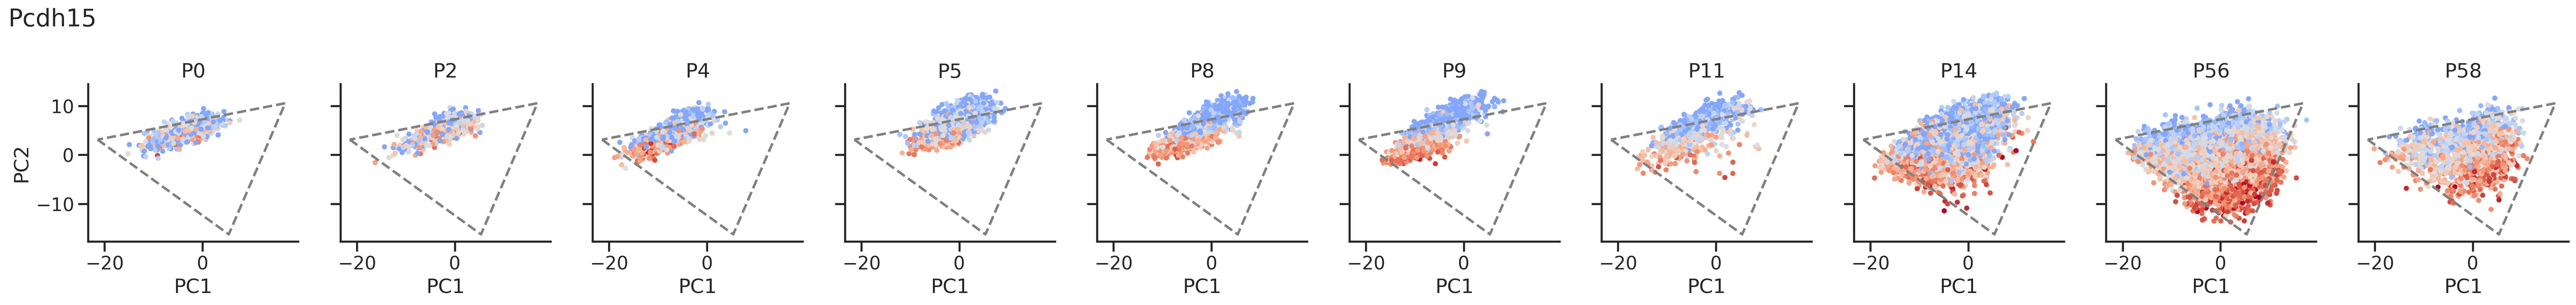

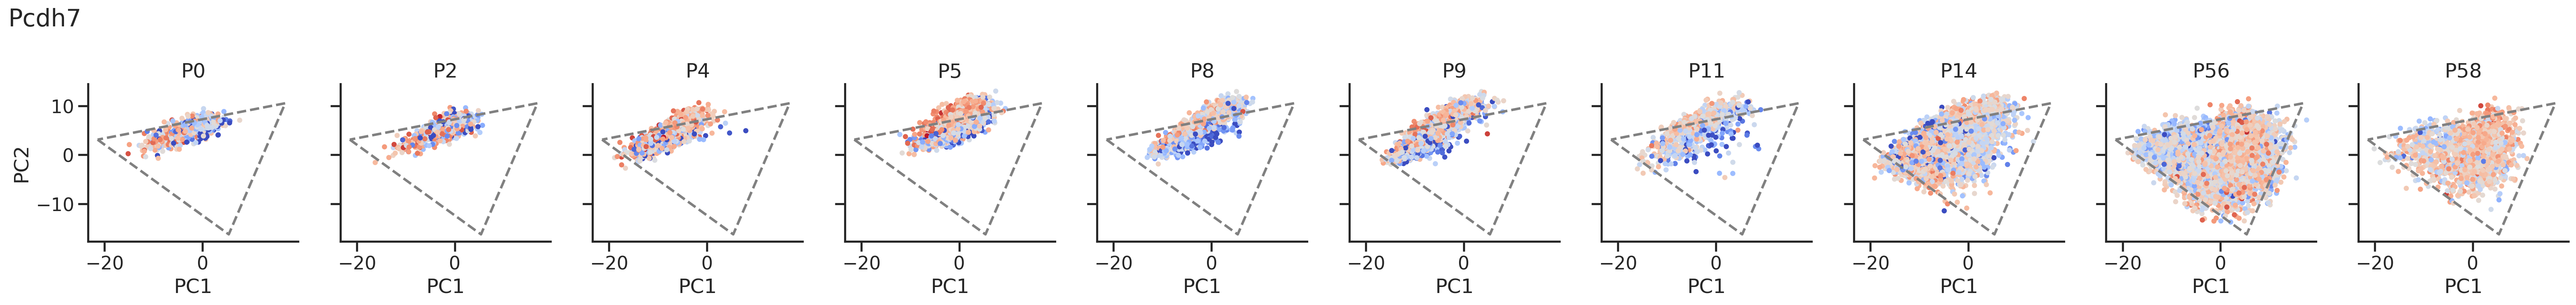

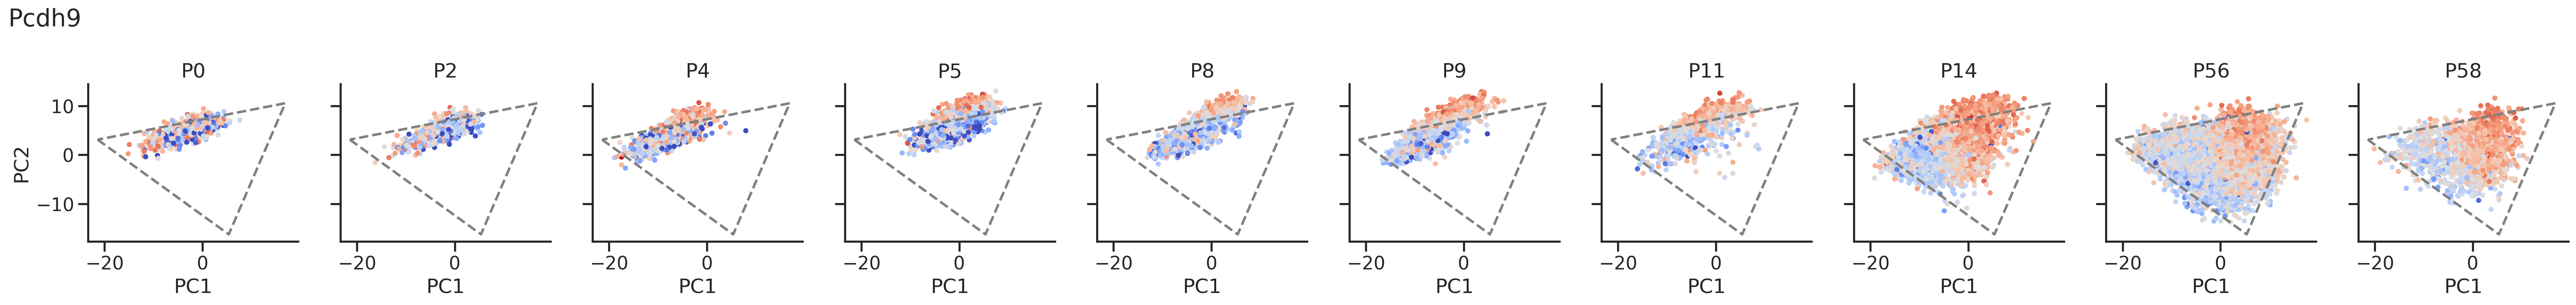

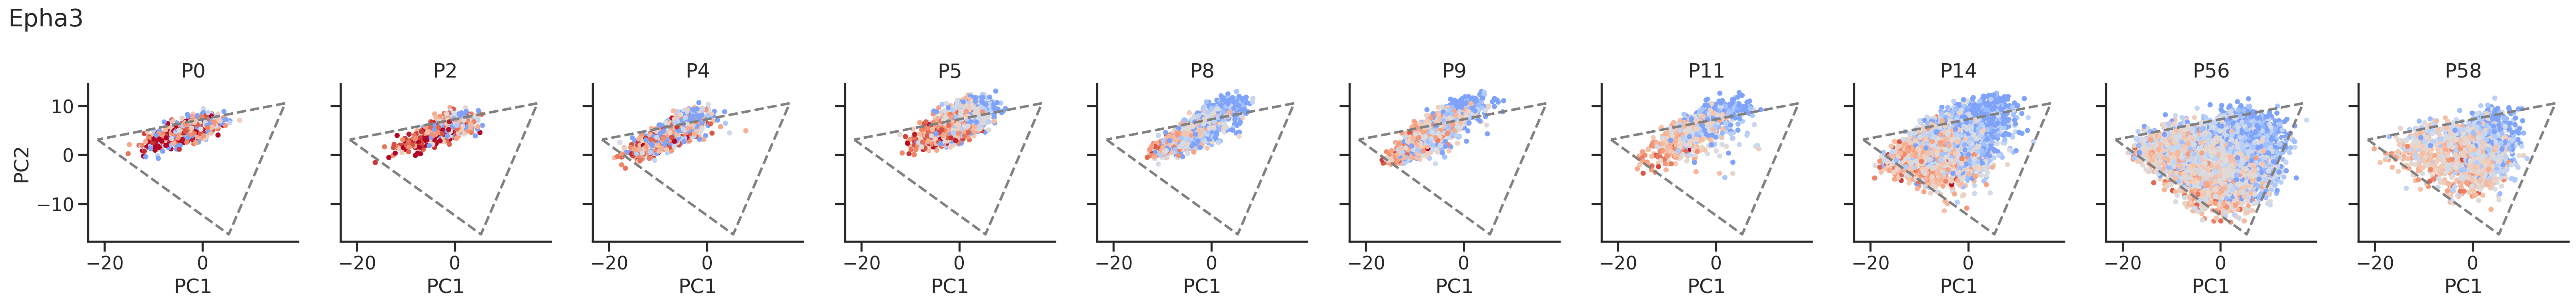

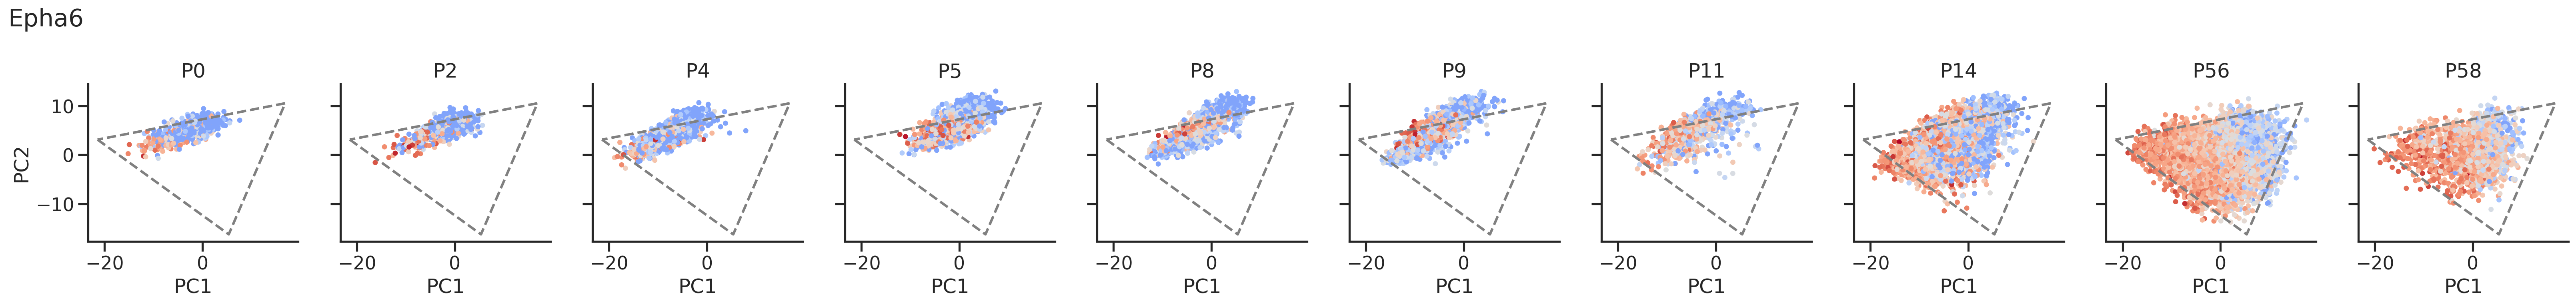

In [42]:
# plot
genes = [
    'Meis2', 'Foxp1', 'Sorcs3',
    'Cdh13', 'Cdh12', 'Pcdh15',
    'Pcdh7', 'Pcdh9', 
    'Epha3', 'Epha6',
]

n = len(todo_conds)

for gene in genes:
    fig, axs = plt.subplots(1,n,figsize=(4*n,4), sharex=True, sharey=True)
    fig.suptitle(gene, x=0.1, ha='left')
    for i, cond in enumerate(todo_conds):
        ax = axs[i]
        aa = aas[-2]

        ressub = res[res['cond']==cond]
        xp = ressub[['pcs_later2', 'pcs_later3']].values # pcs_later[:,:2]

        c = ressub[gene]

        vmax = np.percentile(c, 95)
        vmin = np.percentile(c, 5)

        ax.scatter(xp[:,0], xp[:,1], 
                   c=c, 
                   vmax=2.5,  #vmax,
                   vmin=-2.5, #vmin,
                   cmap='coolwarm', 
                   s=10, rasterized=True) #  c=types_colorvec, s=2)

        plot_archetype(ax, aa, fmt='--', color='gray', zorder=2)
        # ax.scatter(aa[0,0], aa[1,0], color='C0', zorder=2)
        # ax.scatter(aa[0,1], aa[1,1], color='C1', zorder=2)
        # ax.scatter(aa[0,2], aa[1,2], color='C2', zorder=2)

        ax.set_title(cond)

        ax.set_xlabel('PC1')
        if i == 0:
            ax.set_ylabel('PC2')
        ax.set_aspect('equal')
        sns.despine(ax=ax)
        ax.grid(False)
        # break

    # output = os.path.join(outdirfig, f'pc12_density.pdf')
    # powerplots.savefig_autodate(fig, output)
    plt.show()
    
    # break

In [41]:
todo_conds

['P0', 'P2', 'P4', 'P5', 'P8', 'P9', 'P11', 'P14', 'P56', 'P58']